In [10]:
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns


sns.set_style('darkgrid')


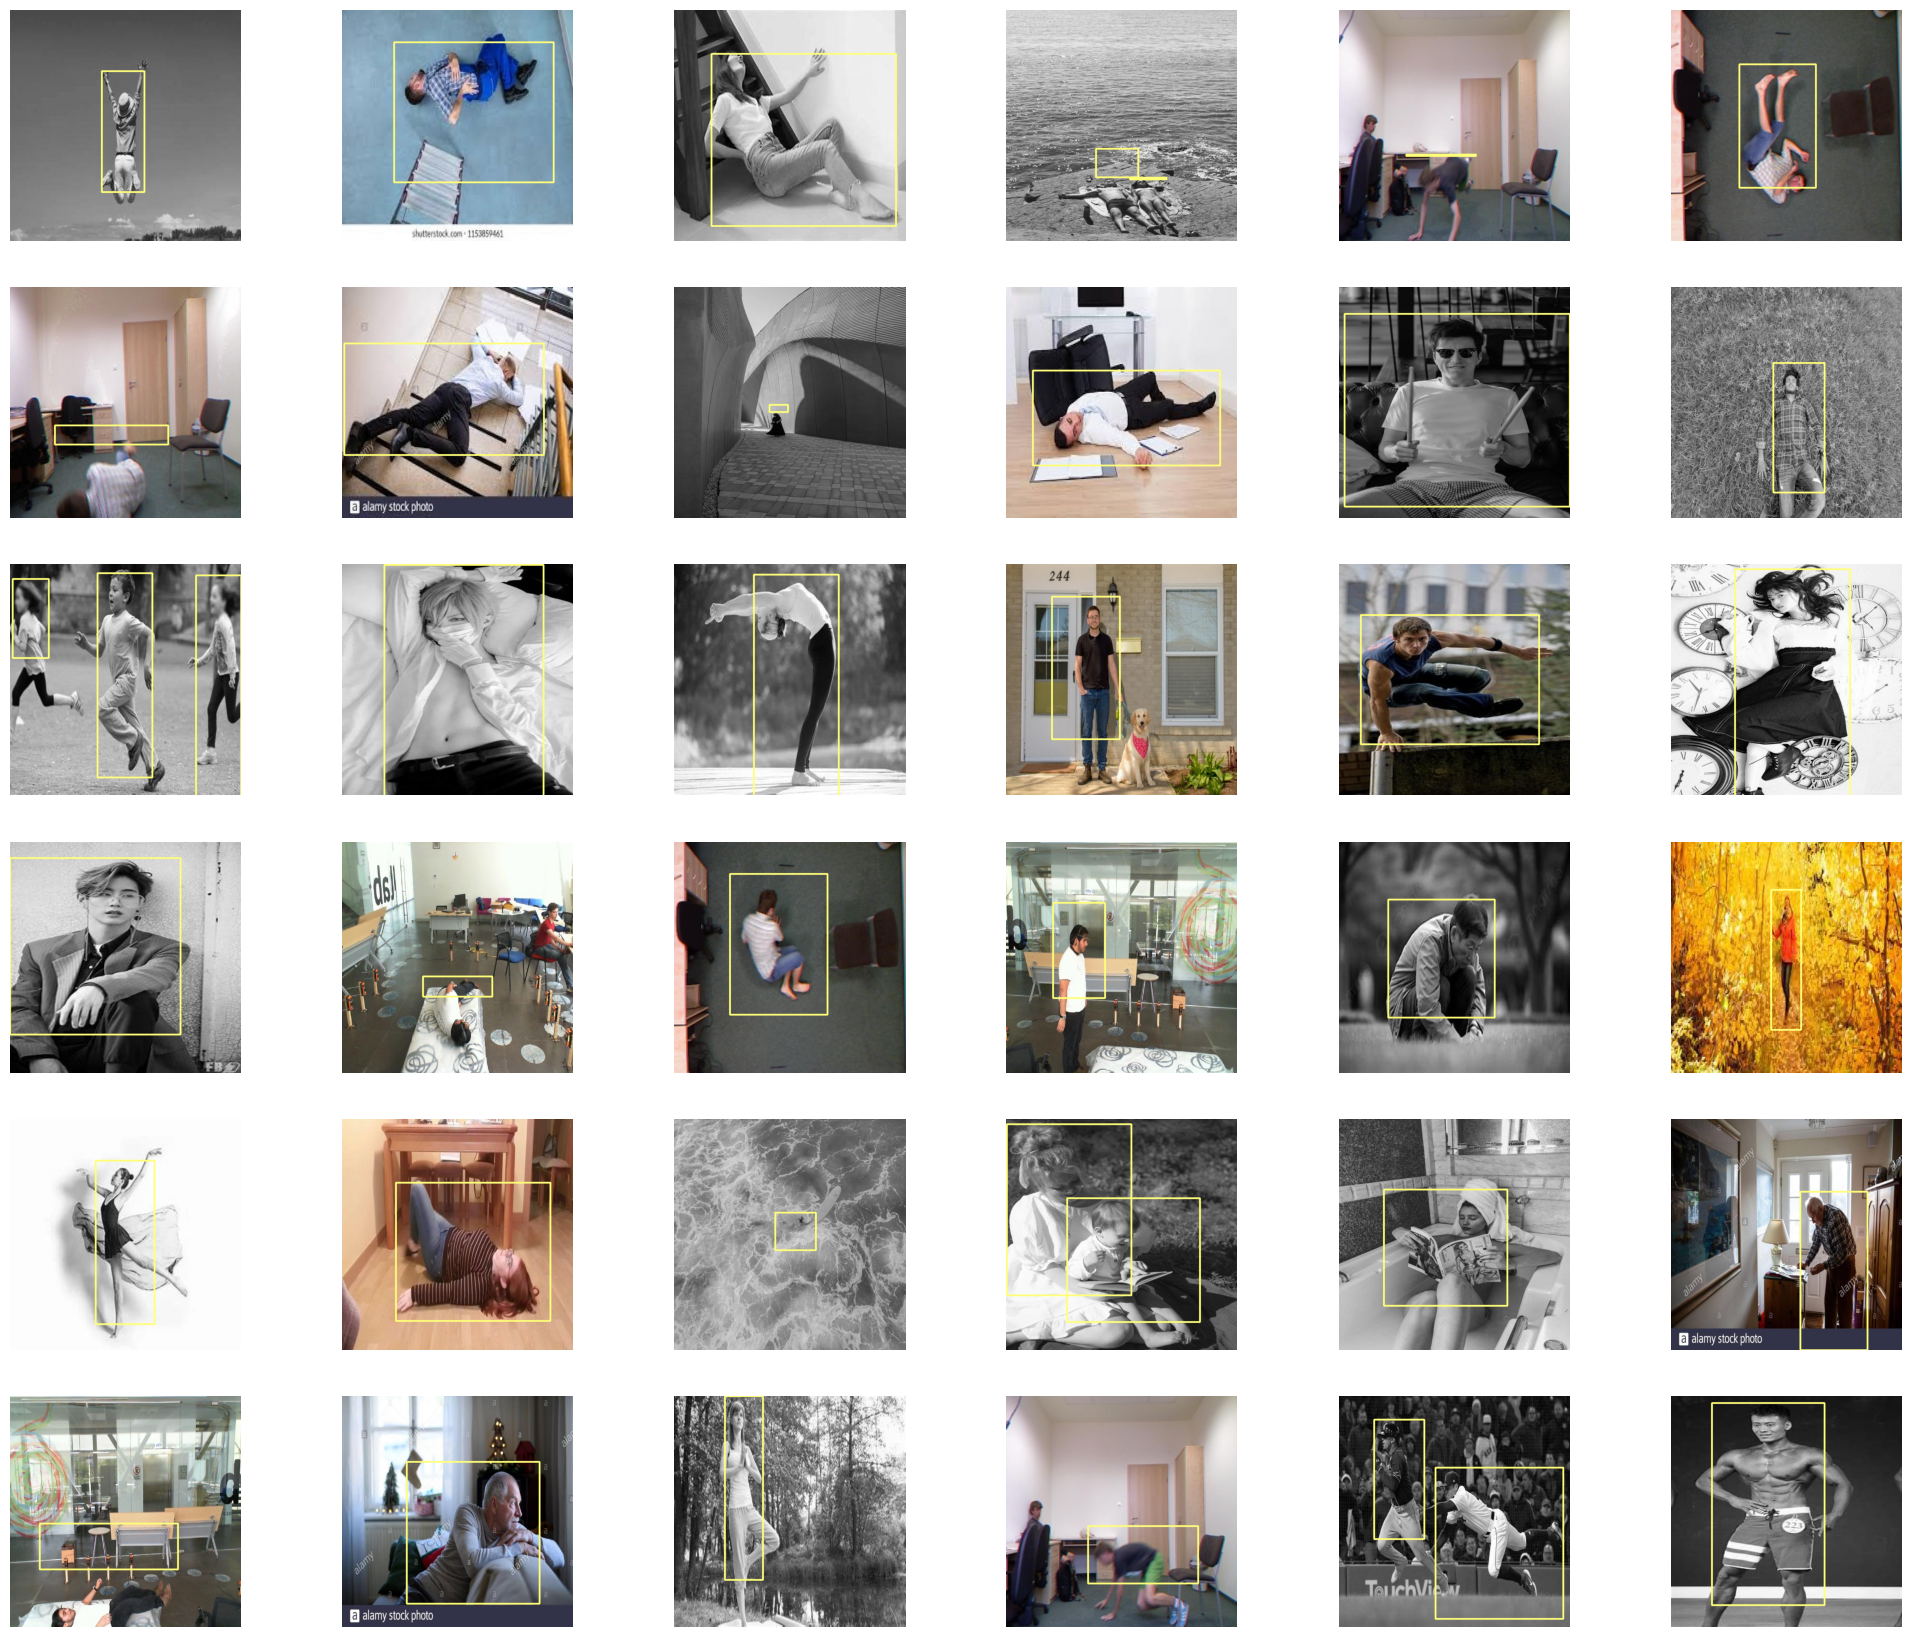

In [15]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# 定義絕對路徑
base_path = r"D:\Code\anaconda\code\yolo detection action\YOLO detection.v1i.yolov11"
train_images = os.path.join(base_path, "train/images")
train_labels = os.path.join(base_path, "train/labels")

test_images = os.path.join(base_path, "test/images")
test_labels = os.path.join(base_path, "test/labels")

val_images = os.path.join(base_path, "valid/images")
val_labels = os.path.join(base_path, "valid/labels")

# 讀取圖片檔案名
image_files = os.listdir(train_images)

# 隨機選取36張圖片
random_images = random.sample(image_files, 36)

# 建立圖片展示
fig, axs = plt.subplots(6, 6, figsize=(25, 21))
for i, image_file in enumerate(random_images):
    row = i // 6
    col = i % 6
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width / 2) * image.shape[1])
        y_min = int((y_center - height / 2) * image.shape[0])
        x_max = int((x_center + width / 2) * image.shape[1])
        y_max = int((x_center + height / 2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (122, 255, 255), 3)

    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()


In [16]:
# 定義絕對路徑
image_path = r"D:\Code\anaconda\code\yolo detection action\YOLO detection.v1i.yolov11\train\images\_1_img_1032_688_jpg.rf.ef72d6d410505c3712bb4f2766259ed6.jpg"

# 讀取影像
img = cv2.imread(image_path)

# 取得影像的維度
height, width, channels = img.shape

# 打印影像的維度
print(f"The image has dimensions {width}x{height} and {channels} channels.")


The image has dimensions 640x640 and 3 channels.


In [17]:
# 設定模型路徑和數據路徑
model_path = r"D:\Code\anaconda\code\yolo detection action\yolov8s.pt"
data_path = r"D:\Code\anaconda\code\yolo detection action\YOLO detection.v1i.yolov11\data.yaml"

# 初始化模型
model = YOLO(model_path)

# 訓練模型
model.train(data=data_path,
            epochs=15,
            imgsz=762,
            seed=42,
            batch=16,  # 減小批次大小
            workers=6)


New https://pypi.org/project/ultralytics/8.3.75 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.4.0 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):
    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# 定義絕對路徑
post_training_files_path = r"D:\Code\anaconda\code\ship_yolo\runs\detect\train7"

image_files = [
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

display_images(post_training_files_path, image_files)


In [ ]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

fig = plt.gcf()
fig.set_size_inches(8, 6)

for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
plt.show()

In [ ]:
model = YOLO('D:/Code/anaconda/code/ship_yolo/runs/detect/train7/weights/best.pt')


In [ ]:
image_dir = "D:/Code/anaconda/code/ship_yolo/ships-aerial-images/test/images"

all_images = os.listdir(image_dir)
selected_images = all_images[:45]

for img_name in selected_images:
    img_path = os.path.join(image_dir, img_name) 
    results = model.predict(img_path)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    for result in results:
        plotted_img = result.plot()
        plt.figure(figsize=(8, 6))  
        plt.imshow(plotted_img)    
        plt.axis('off')             
        plt.show() 
